# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the loan data
df = pd.read_csv('loan_data.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names and types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (45000, 14)

First few rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0          71          male        Associate   46817.176426               3   
1          34          male      High School   79093.494008              17   
2          80          male        Associate   67819.614431              20   
3          40        female        Associate   49599.861220               0   
4          43          male        Doctorate   99833.900180               8   

  person_home_ownership     loan_amnt loan_intent  loan_int_rate  \
0                  RENT  11567.737650     MEDICAL      10.351469   
1                   OWN   9519.674498     MEDICAL      11.168902   
2                   OWN  16226.604002    PERSONAL      12.293112   
3                  RENT  15641.221708     VENTURE      10.327926   
4                   OWN  12727.942517   EDUCATION       9.338069   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0   

# Exploratory Data Analysis

Let's explore how different features relate to loan approval status. We'll focus on age and gender as requested, plus 5 additional features to get a comprehensive understanding of what drives the loan approval model.

In [24]:
# Check the distribution of loan approvals
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())
print("\nLoan Approval Rate:")
print(df['loan_status'].value_counts(normalize=True) * 100)

Loan Status Distribution:
loan_status
0    40107
1     4893
Name: count, dtype: int64

Loan Approval Rate:
loan_status
0    89.126667
1    10.873333
Name: proportion, dtype: float64


## 1. Loan Status by Age

Does the applicant's age affect their chances of loan approval?

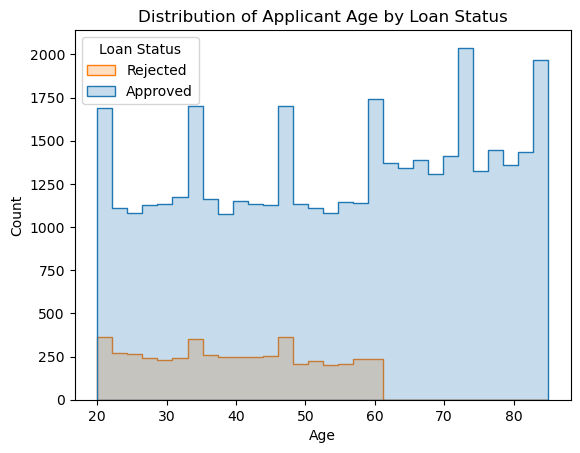

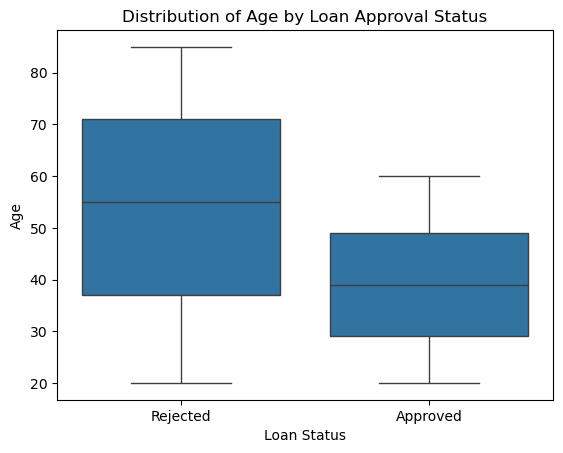

Mean age by loan status:
loan_status
0    54.021318
1    39.482117
Name: person_age, dtype: float64


In [18]:
# Compare age distribution between approved and rejected loans using histograms
sns.histplot(x='person_age', hue='loan_status', data=df, element='step', bins=30)
plt.title('Distribution of Applicant Age by Loan Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'], title='Loan Status')
plt.show()

# Box plot comparison
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title('Distribution of Age by Loan Approval Status')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Age')
plt.show()

# Calculate mean age by loan status
print("Mean age by loan status:")
print(df.groupby('loan_status')['person_age'].mean())

## 2. Loan Status by Gender

Is there evidence of gender discrimination in loan approvals?

Loan Approval by Gender (counts):
loan_status        0     1
person_gender             
female         15934  1975
male           24173  2918

Loan Approval Rate by Gender (%):
loan_status            0          1
person_gender                      
female         88.972025  11.027975
male           89.228895  10.771105


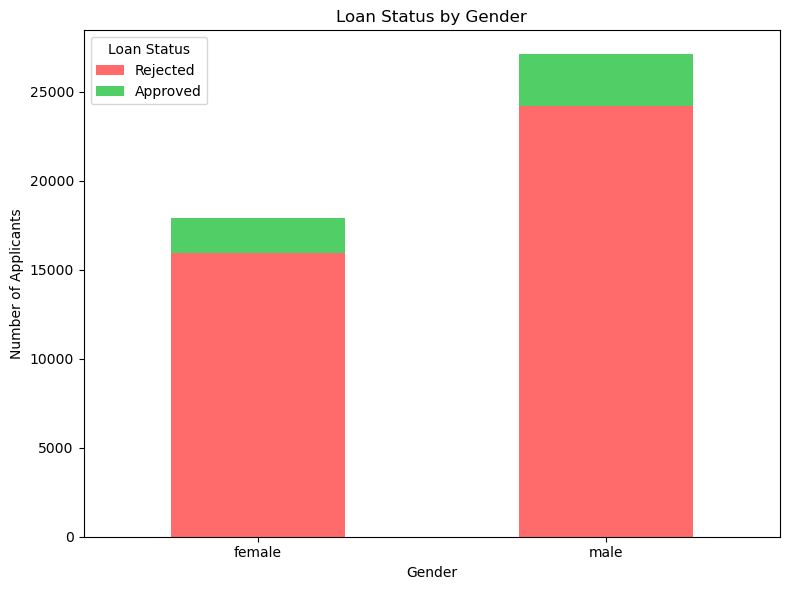

In [12]:
# Cross-tabulation of gender and loan status
print("Loan Approval by Gender (counts):")
print(pd.crosstab(df['person_gender'], df['loan_status']))
print("\nLoan Approval Rate by Gender (%):")
print(pd.crosstab(df['person_gender'], df['loan_status'], normalize='index') * 100)

# Stacked bar chart
cross_tab_df = pd.DataFrame(pd.crosstab(df['person_gender'], df['loan_status']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Loan Status by Gender', ylabel='Number of Applicants', figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(['Rejected', 'Approved'], title='Loan Status')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

## 3. Loan Status by Credit Score

Credit score is likely a major factor in loan decisions.

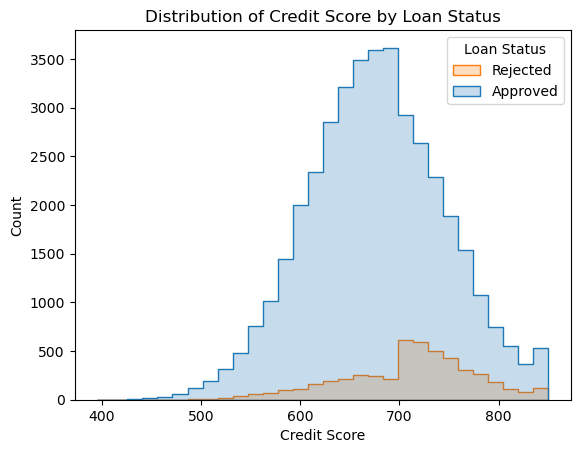

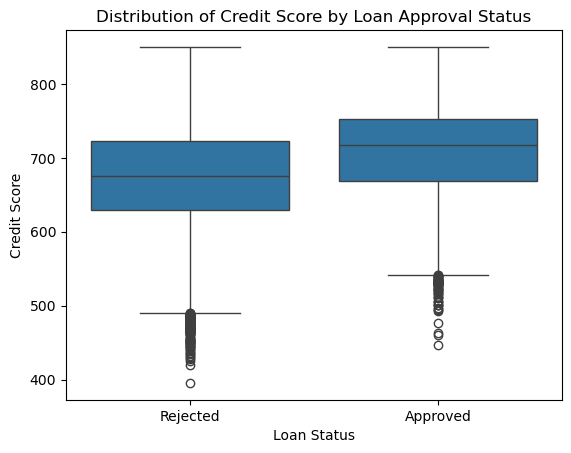

Credit Score by loan status:
               count        mean        std         min         25%  \
loan_status                                                           
0            40107.0  676.202446  69.295510  395.607228  629.756781   
1             4893.0  709.749597  67.392747  446.303846  668.123236   

                    50%         75%    max  
loan_status                                 
0            675.642685  722.838876  850.0  
1            717.207593  752.834290  850.0  


In [19]:
# Histogram comparison
sns.histplot(x='credit_score', hue='loan_status', data=df, element='step', bins=30)
plt.title('Distribution of Credit Score by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'], title='Loan Status')
plt.show()

# Box plot comparison
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title('Distribution of Credit Score by Loan Approval Status')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Credit Score')
plt.show()

# Calculate statistics
print("Credit Score by loan status:")
print(df.groupby('loan_status')['credit_score'].describe())

## 4. Loan Status by Income

Does higher income lead to higher approval rates?

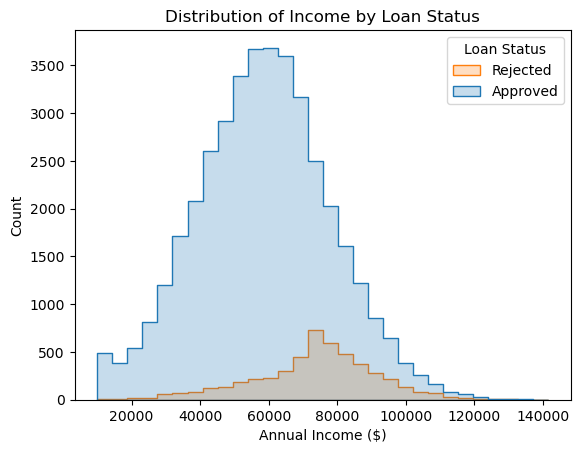

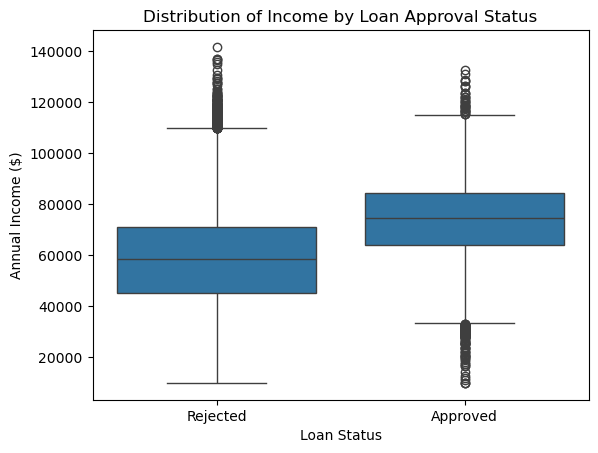

Income by loan status:
               count          mean           std      min           25%  \
loan_status                                                               
0            40107.0  58528.531356  19475.151323  10000.0  45377.662233   
1             4893.0  73514.758800  17739.062377  10000.0  63943.963360   

                      50%           75%            max  
loan_status                                             
0            58519.753892  71090.902676  141514.800793  
1            74654.580855  84392.676748  132288.929237  


In [20]:
# Histogram comparison
sns.histplot(x='person_income', hue='loan_status', data=df, element='step', bins=30)
plt.title('Distribution of Income by Loan Status')
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'], title='Loan Status')
plt.show()

# Box plot comparison
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Distribution of Income by Loan Approval Status')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Annual Income ($)')
plt.show()

# Calculate statistics
print("Income by loan status:")
print(df.groupby('loan_status')['person_income'].describe())

## 5. Loan Status by Previous Loan Defaults

Does having previous defaults on file affect approval?

Loan Approval by Previous Defaults (counts):
loan_status                         0     1
previous_loan_defaults_on_file             
No                              35556  4893
Yes                              4551     0

Loan Approval Rate by Previous Defaults (%):
loan_status                              0          1
previous_loan_defaults_on_file                       
No                               87.903286  12.096714
Yes                             100.000000   0.000000


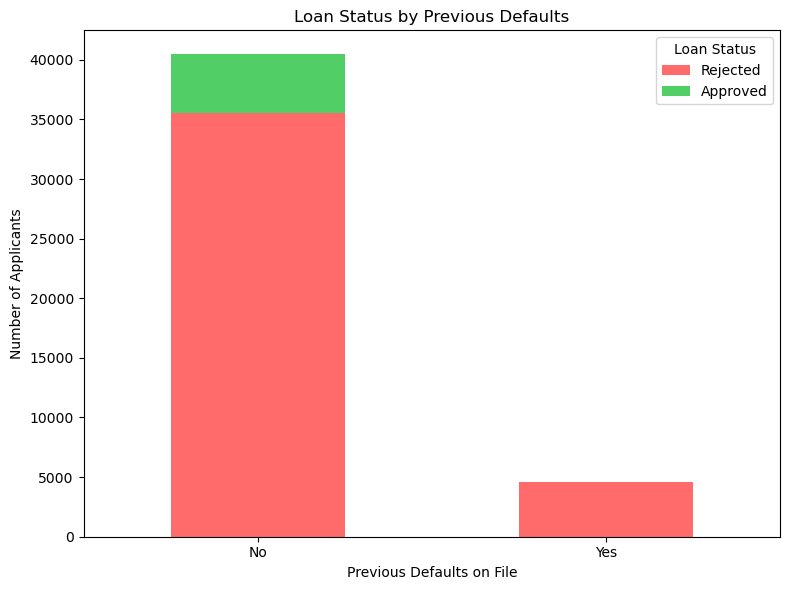

In [15]:
# Cross-tabulation
print("Loan Approval by Previous Defaults (counts):")
print(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status']))
print("\nLoan Approval Rate by Previous Defaults (%):")
print(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status'], normalize='index') * 100)

# Stacked bar chart
cross_tab_df = pd.DataFrame(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Loan Status by Previous Defaults', ylabel='Number of Applicants', figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(['Rejected', 'Approved'], title='Loan Status')
plt.xlabel('Previous Defaults on File')
plt.tight_layout()
plt.show()

## 6. Loan Status by Loan Percent of Income

Does the loan amount relative to income matter?

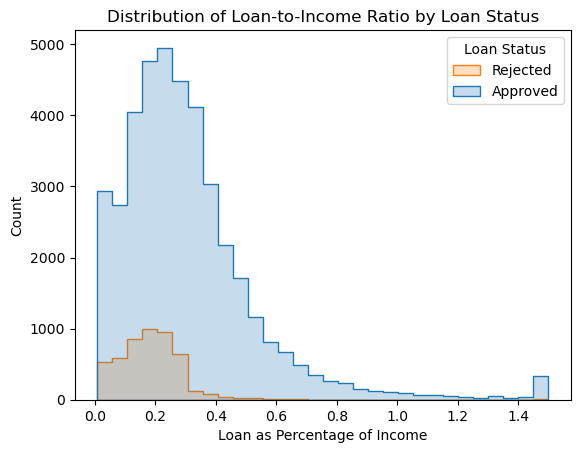

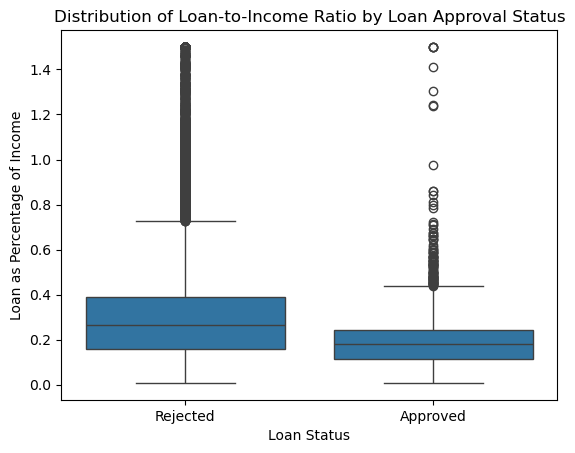

Loan percent of income by loan status:
               count      mean       std       min       25%       50%  \
loan_status                                                              
0            40107.0  0.305799  0.228757  0.007935  0.160467  0.263221   
1             4893.0  0.184616  0.113232  0.008311  0.113145  0.181438   

                  75%  max  
loan_status                 
0            0.387834  1.5  
1            0.243240  1.5  


In [21]:
# Histogram comparison
sns.histplot(x='loan_percent_income', hue='loan_status', data=df, element='step', bins=30)
plt.title('Distribution of Loan-to-Income Ratio by Loan Status')
plt.xlabel('Loan as Percentage of Income')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'], title='Loan Status')
plt.show()

# Box plot comparison
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribution of Loan-to-Income Ratio by Loan Approval Status')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Loan as Percentage of Income')
plt.show()

# Calculate statistics
print("Loan percent of income by loan status:")
print(df.groupby('loan_status')['loan_percent_income'].describe())

## 7. Loan Status by Employment Experience

Does employment experience affect loan approval?

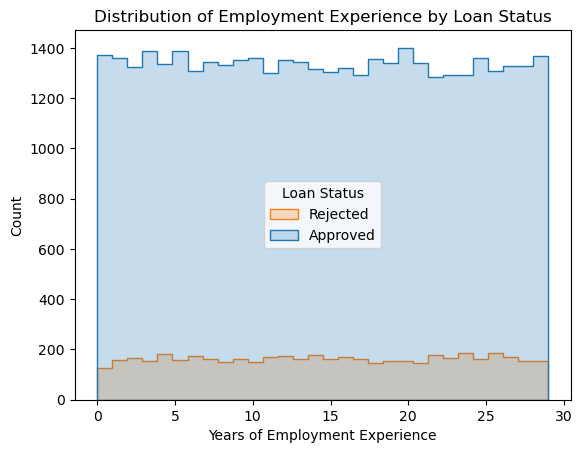

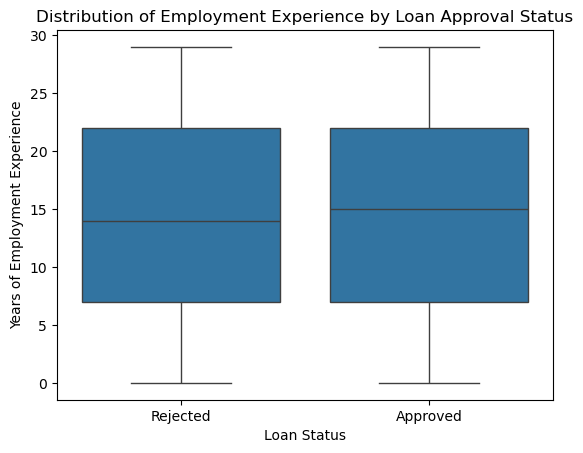

Employment experience by loan status:
               count       mean       std  min  25%   50%   75%   max
loan_status                                                          
0            40107.0  14.440771  8.676920  0.0  7.0  14.0  22.0  29.0
1             4893.0  14.649499  8.599401  0.0  7.0  15.0  22.0  29.0


In [22]:
# Histogram comparison
sns.histplot(x='person_emp_exp', hue='loan_status', data=df, element='step', bins=30)
plt.title('Distribution of Employment Experience by Loan Status')
plt.xlabel('Years of Employment Experience')
plt.ylabel('Count')
plt.legend(labels=['Rejected', 'Approved'], title='Loan Status')
plt.show()

# Box plot comparison
sns.boxplot(x='loan_status', y='person_emp_exp', data=df)
plt.title('Distribution of Employment Experience by Loan Approval Status')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel('Years of Employment Experience')
plt.show()

# Calculate statistics
print("Employment experience by loan status:")
print(df.groupby('loan_status')['person_emp_exp'].describe())

# Summary and Analysis

Based on the visualizations above, let's answer the key questions:

## Which features drive the model's decision to grant a loan?

**Strong Drivers:**
- **Previous Defaults** - ABSOLUTE DRIVER: 100% rejection rate for applicants with defaults (0% approval vs 12% for those without). This is the single strongest predictor.
- **Credit Score** - STRONG DRIVER: Approved mean=710, Rejected mean=676 (34-point difference). Clear separation in distributions.
- **Income** - STRONG DRIVER: Approved mean=$73.5k, Rejected mean=$58.5k ($15k difference). Higher income strongly predicts approval.
- **Loan-to-Income Ratio** - STRONG DRIVER: Approved=0.185, Rejected=0.306. Approved applicants request only 18% of income vs 31% for rejected.
- **Age** - CONCERNING DRIVER: Approved mean=39.5 years, Rejected mean=54.0 years (14.5-year difference). Older applicants systematically rejected more often.

## Which features seem unrelated to loan approval?

- **Gender** - NO RELATIONSHIP: Female 11.03% approved vs Male 10.77% approved (essentially identical rates). Distributions overlap completely.
- **Employment Experience** - NO RELATIONSHIP: Both approved and rejected groups average ~14.6 years with nearly identical distributions (mean=14.4 vs 14.6).

## Should the financial institution be concerned about potential legal trouble?

**YES - Serious Age Discrimination Concerns:**
- The 14.5-year age gap between approved (39.5) and rejected (54.0) applicants is highly concerning. Older applicants are systematically rejected more often, which could violate the Age Discrimination in Employment Act (ADEA) and Equal Credit Opportunity Act (ECOA).
- The institution should investigate whether age is being used directly or as a proxy variable in loan decisions.
- **Recommendation:** Control for legitimate factors (credit score, income, defaults, loan-to-income ratio) to see if age still independently predicts rejection. If so, this indicates illegal discrimination.

**NO Gender Discrimination:**
- Approval rates are virtually identical for men and women (10.77% vs 11.03%), indicating no gender bias. This is good news for the discrimination claims.

**Legitimate Factors:**
- Credit score, income, previous defaults, and loan-to-income ratio are all legally permissible creditworthiness factors that legitimately predict repayment ability. These can be used in lending decisions without legal concern.